___

<h1 style="background-color: lightblue; color: black; font-family: cursive; font-size: 450%; text-align: center; border-radius: 50px 50px">Prediccion del Precio en el Mercado Inmobiliario de Montevideo</h1>

<center> 

![Image](https://storage.googleapis.com/kaggle-datasets-images/5661882/9342442/350ae0d62e75ad4b8db0037c57f8d51f/dataset-cover.jpg?t=2024-09-08-03-47-29)

</center>

___

<h1 id="goto0" style="background-color:lightblue;font-family:cursive;color:black;font-size:350%;text-align:center;border-radius: 50px 50px;">Tabla de Contenido</h1>

<div style="font-family: cursive">

0. [Tabla de Contenido](#goto0)

1. [Descripcion del Notebook](#goto1)

2. [Carga de Librerias](#goto2)

3. [Lectura de Datos](#goto3)

4. [Exploracion de Datos](#goto4)

5. [Transformacion de Datos](#goto5)

5. [Modelado](#goto6)

    6a. [AutoGluon](#goto6b)

6. [Carga del Mejor Modelo](#goto6)

7. [Conclusiones](#goto7)

</div>

<h1 id="goto1" style="background-color:lightblue;font-family:cursive;color:black;font-size:350%;text-align:center;border-radius: 50px 50px;">Descripcion del Notebook</h1>

<div style="font-family: cursive">

[Regresar al Contenido](#goto0)

</div>

<div style="font-family: cursive">

El dataset contiene información sobre propiedades en venta en Montevideo. Cada fila representa una propiedad y las columnas proporcionan detalles específicos sobre cada una de ellas. La idea es predecir el precio de las propiedades en funcion de las demas variables usando una mezcla de técnicas desde el analisis hasta el modelado.

</div>

>Referencia: [Casas a la venta en Montevideo](https://www.kaggle.com/datasets/lasm1984/casas-a-la-venta-en-montevideo)

>Por [Ale uy](https://www.kaggle.com/lasm1984)

<h1 id="goto2" style="background-color:lightblue;font-family:cursive;color:black;font-size:350%;text-align:center;border-radius: 50px 50px;">Carga de Librerias</h1>

<div style="font-family: cursive">

[Regresar al Contenido](#goto0)

</div>

In [203]:
# Libraries for loading and ordering tabular data
import pandas as pd; pd.set_option('display.max_columns', 30)

# Libraries for visualizing data
import matplotlib.pyplot as plt; plt.style.use('ggplot')

# Libraries for imputing and transformation data
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Library for Modeling data
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor

# Reduce the verbosity of warnings
import warnings; warnings.filterwarnings("ignore")

<h1 id="goto3" style="background-color:lightblue;font-family:cursive;color:black;font-size:350%;text-align:center;border-radius: 50px 50px;">Lectura de Datos</h1> 

<div style="font-family: cursive">

[Regresar al Contenido](#goto0)

</div>

In [204]:
df = pd.read_csv('ventas_casas_montevideo.csv')

print('The dimension of the df dataset is:', df.shape)

The dimension of the df dataset is: (2501, 18)


In [205]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitud,2406.0,-34.800922,2.691588,-53.781835,-34.908532,-34.897181,-34.882472,3.958529e+01
Longitud,2406.0,-56.200963,1.540131,-98.486917,-56.178411,-56.154518,-56.121139,-5.400000e+01
Precio,2501.0,332396.790484,304728.721310,49000.000000,140000.000000,224000.000000,395000.000000,2.100000e+06
Gastos_Comunes,2501.0,148.740134,260.560483,0.000000,0.000000,37.500000,170.000000,1.750000e+03
Fecha_Construccion,1853.0,1992.536967,32.041809,1900.000000,1964.000000,2005.000000,2023.000000,2.026000e+03
Banos,2498.0,1.862290,0.996314,1.000000,1.000000,2.000000,3.000000,1.600000e+01
M2_edificados,2501.0,120.581261,109.521351,0.000000,50.000000,80.000000,156.000000,8.000000e+02
M2_de_terraza,2501.0,8.211624,30.284169,-43.000000,0.000000,0.000000,5.000000,5.880000e+02
M2_del_terreno,2501.0,115.953252,182.300337,0.000000,0.000000,4.000000,159.000000,9.750000e+02
Dormitorios,2349.0,2.681567,1.558323,0.000000,2.000000,3.000000,3.000000,3.200000e+01


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tipo_de_Propiedad   2501 non-null   object 
 1   Zona                2501 non-null   object 
 2   Fecha_Publicacion   2501 non-null   object 
 3   Latitud             2406 non-null   float64
 4   Longitud            2406 non-null   float64
 5   Precio              2501 non-null   int64  
 6   Gastos_Comunes      2501 non-null   float64
 7   Fecha_Construccion  1853 non-null   float64
 8   Estado              2460 non-null   object 
 9   Disposicion         2461 non-null   object 
 10  Banos               2498 non-null   float64
 11  M2_edificados       2501 non-null   float64
 12  M2_de_terraza       2501 non-null   float64
 13  M2_del_terreno      2501 non-null   float64
 14  Dormitorios         2349 non-null   float64
 15  Garajes             2501 non-null   float64
 16  Vivien

<h1 id="goto4" style="background-color:lightblue;font-family:newtimeroman;color:black;font-size:350%;text-align:center;border-radius: 50px 50px;">Exploracion de Datos</h1>

<div style="font-family: cursive">

[Regresar al Contenido](#goto0)

</div>

In [207]:
# Check duplicates percentage
print('Percentage of duplicates: % ', int((df.duplicated().sum()/df.shape[0])*100))

Percentage of duplicates: %  64


In [208]:
# Nulls analysis
df.isnull().sum().sort_values(ascending=False)

Fecha_Construccion    648
Dormitorios           152
Latitud                95
Longitud               95
Estado                 41
Disposicion            40
Descripcion            14
Banos                   3
Gastos_Comunes          0
Precio                  0
Zona                    0
M2_edificados           0
M2_de_terraza           0
M2_del_terreno          0
Fecha_Publicacion       0
Garajes                 0
Vivienda_Social         0
Tipo_de_Propiedad       0
dtype: int64

In [209]:
# Fill the null values in the columns 'M2_de_terraza', 'M2_del_terreno', 'Dormitorios', and 'Banos' with 0
df['M2_de_terraza'] = df['M2_de_terraza'].fillna(0)
df['M2_del_terreno'] = df['M2_del_terreno'].fillna(0)
df['Dormitorios'] = df['Dormitorios'].fillna(0)
df['Banos'] = df['Banos'].fillna(0)

In [210]:
# Impute nulls in the 'Estado' column with 'Sin Definir'
df['Estado'] = df['Estado'].fillna('Sin Definir')

In [211]:
# Remove features 'Latitud', 'Longitud', 'Fecha_Publicacion', 'M2_edificados', and 'Descripcion'
df = df.drop(columns=['Latitud', 'Longitud', 'Fecha_Publicacion', 'M2_edificados', 'Descripcion'])

In [212]:
# Nulls analysis after imputation
df.isnull().sum().sort_values(ascending=False)

Fecha_Construccion    648
Disposicion            40
Tipo_de_Propiedad       0
Zona                    0
Precio                  0
Gastos_Comunes          0
Estado                  0
Banos                   0
M2_de_terraza           0
M2_del_terreno          0
Dormitorios             0
Garajes                 0
Vivienda_Social         0
dtype: int64

### Update: 
**Once the model was trained, we detected that 4 variables are not significant for the model and we will proceed to eliminate them before proceeding.**

In [213]:
# Remove features 'Disposicion', 'Fecha_Construccion', 'Vivienda_Social'
df = df.drop(columns=['Disposicion', 'Fecha_Construccion', 'Vivienda_Social'])

<h1 id="goto5" style="background-color:lightblue;font-family:newtimeroman;color:black;font-size:350%;text-align:center;border-radius: 50px 50px;">Transformacion de Datos</h1>

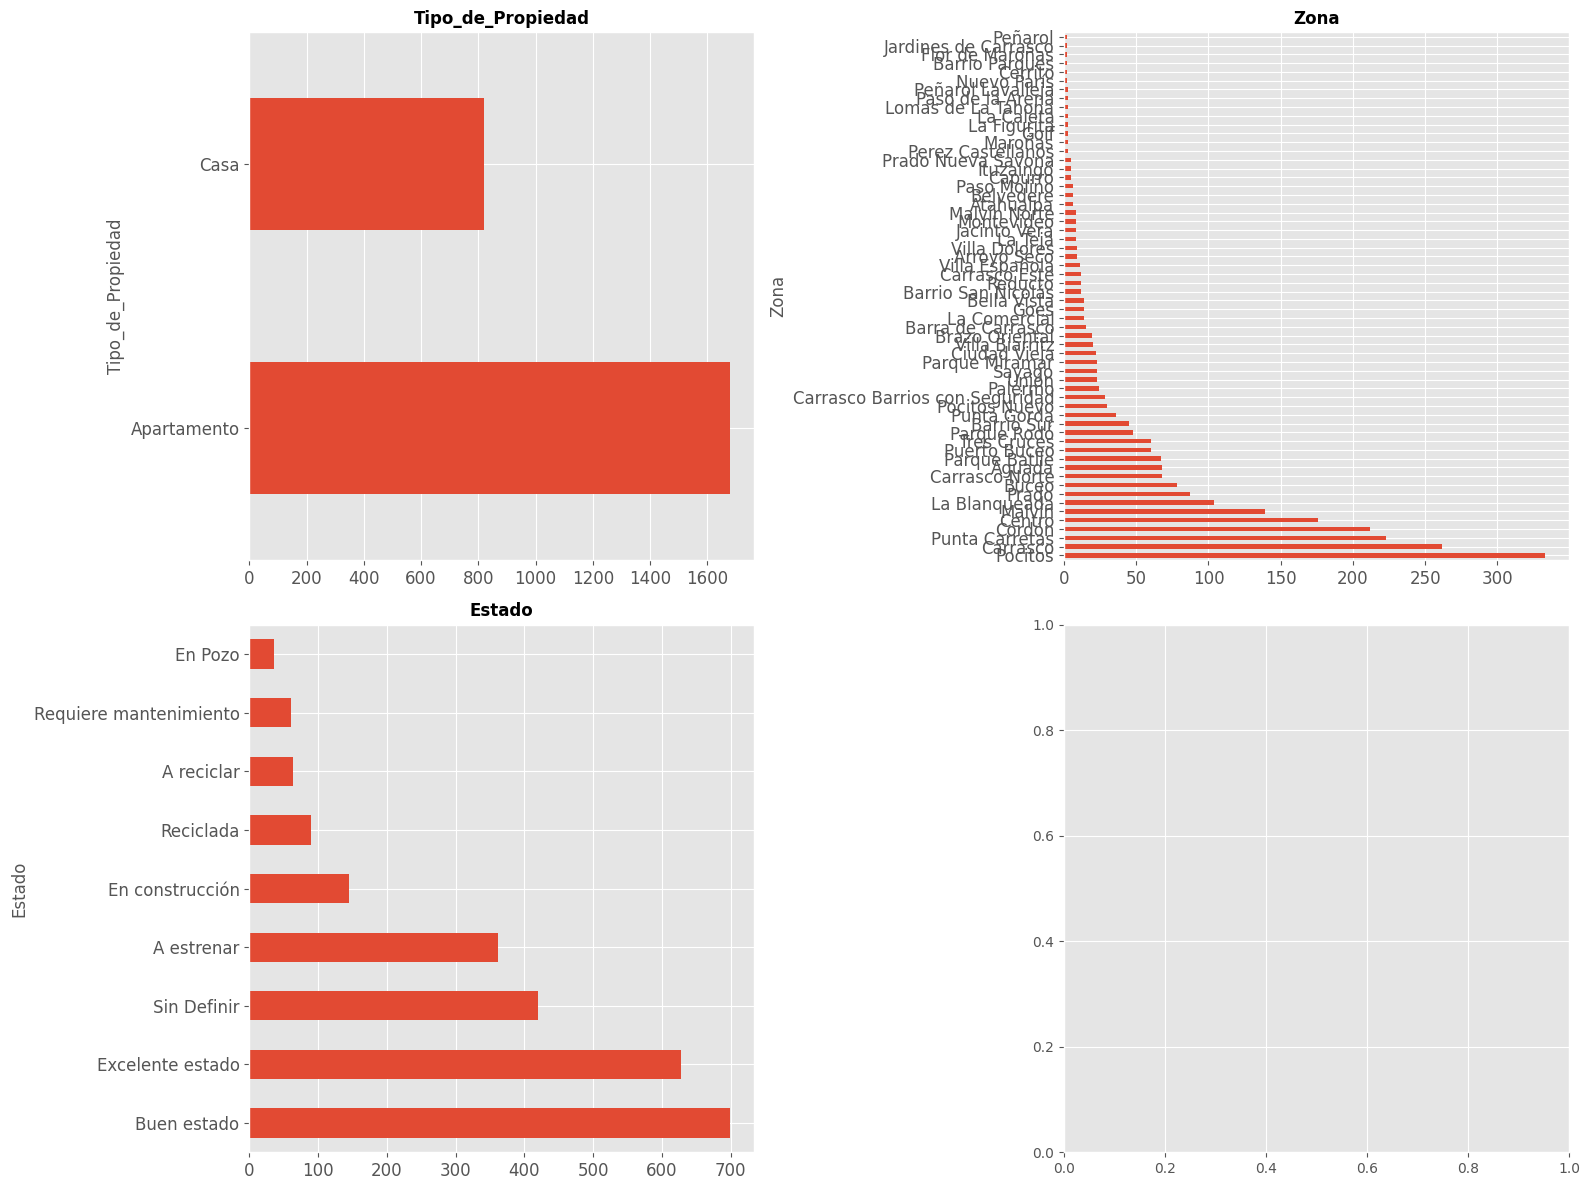

In [214]:
# Select categorical columns from the DataFrame
categorical_columns = df.select_dtypes('O').columns
# Calculate the number of categorical columns and rows to organize the plots
num_columns = len(categorical_columns)
rows = (num_columns + 1) // 2
# Create the figure and axes for the plots
_, ax = plt.subplots(nrows=rows, ncols=2, figsize=(16, rows * 6))
ax = ax.flat
# Generate horizontal bar charts for each categorical variable
for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot.barh(ax=ax[i])
    ax[i].set_title(col, fontsize=12, fontweight="bold")
    ax[i].tick_params(labelsize=12)
# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

Nota: Vistos los datos etiquetados como 'Sin Definir', se decide continuar con ellos dentro de una categoría específica, esperando que distorsionen lo menos posible el resto de los datos.

In [215]:
# Categorize variable 'M2_del_terreno' in ['Sin Terreno', 'Chico', 'Grande']
def categorize_m2_terreno(m2):
    if m2 == 0:
        return 'Sin Terreno'
    elif m2 < 200:
        return 'Chico'
    else:
        return 'Grande'
df['M2_del_terreno'] = df['M2_del_terreno'].apply(categorize_m2_terreno)

# Categorize variable 'M2_de_terraza' to 'Terraza' in ['Sin Terraza' = 0, 'Con Terraza' = 1]
def categorize_m2_terraza(m2):
    if abs(m2) == 0:
        return 0
    else:
        return 1
df['M2_de_terraza'] = df['M2_de_terraza'].apply(categorize_m2_terraza)
df.rename(columns={'M2_de_terraza': 'Terraza'}, inplace=True)

In [216]:
# Standard Scaler 'Gastos Comunes', 'Garajes', 'Banos', 'Dormitorios'
scaler = StandardScaler()
df['Gastos_Comunes'] = scaler.fit_transform(df[['Gastos_Comunes']])
df['Garajes'] = scaler.fit_transform(df[['Garajes']])
df['Banos'] = scaler.fit_transform(df[['Banos']])
df['Dormitorios'] = scaler.fit_transform(df[['Dormitorios']])

In [217]:
# Re-Check duplicates percentage
print('Percentage of duplicates: % ', int((df.duplicated().sum()/df.shape[0])*100))

Percentage of duplicates: %  64


In [218]:
# Delete the duplicates and may luck be with us...
df = df.drop_duplicates()
df.shape

(880, 10)

In [219]:
# Scale 'Precio' column to thousands
df['Precio'] = df['Precio'] // 1000

### Dos Opciones: 'Label encoder' o 'dummies'

In [220]:
def convert_to_numeric(df) -> tuple[pd.DataFrame, pd.DataFrame]:
    # Convert features to numeric with label encoder when label=True
    df_label = df.copy()
    le = LabelEncoder()
    non_numeric_cols = df_label.select_dtypes(include=['object'])
    for col in non_numeric_cols.columns:
        df_label[col] = le.fit_transform(df_label[col])

    # Convert features to numeric with Dummy Variables when label=False
    df_dummies = pd.get_dummies(df)

    return df_label, df_dummies

In [221]:
df_label, df_dummies = convert_to_numeric(df)

In [222]:
df_label.shape, df_dummies.shape

((880, 10), (880, 80))

<h1 id="goto6" style="background-color:lightblue;font-family:newtimeroman;color:black;font-size:350%;text-align:center;border-radius: 50px 50px;">Modelado</h1>

<div style="font-family: cursive">

[Regresar al Contenido](#goto5)

</div>

### Usamos la librería AutoGluon para automatizar el modelado

<h2 id="goto6a" style="background-color:yellow;font-family:newtimeroman;color:black;font-size:250%;text-align:center;border-radius: 50px 50px;">AutoGluon</h2>

<div style="font-family: cursive">

[Regresar a Modelado](#goto6)

</div>

In [223]:
# Split the data into training and testing sets
TARGET = 'Precio'

X_label = df_label.drop(columns=[TARGET])
X_dummie = df_dummies.drop(columns=[TARGET])

y_label = df_label[TARGET]
y_dummie = df_dummies[TARGET]

# Split Label Encoded DataFrame
X_label_train, X_label_test, y_label_train, y_label_test = train_test_split(
    X_label, y_label, 
    stratify=X_label['Tipo_de_Propiedad'], 
    test_size=0.05, random_state=42)
train_data_label = pd.concat([X_label_train, y_label_train], axis=1)
test_data_label = pd.concat([X_label_test, y_label_test], axis=1)

# Split Dummy DataFrame
X_dummie_train, X_dummie_test, y_dummie_train, y_dummie_test = train_test_split(
    X_dummie, y_dummie, 
    test_size=0.05, random_state=42)
train_data_dummie = pd.concat([X_dummie_train, y_dummie_train], axis=1)
test_data_dummie = pd.concat([X_dummie_test, y_dummie_test], axis=1)

LabelEncode Dataset

In [192]:
# Define the AutoGluon model
predictor_label = TabularPredictor(label=TARGET, path='Models/LabelEncoded').fit(train_data_label, verbosity=0)

# Evaluate the model
predictor_label.evaluate(test_data_label, silent=True)

{'root_mean_squared_error': -138.47613538299336,
 'mean_squared_error': -19175.640070609108,
 'mean_absolute_error': -82.70165304704146,
 'r2': 0.785016112703955,
 'pearsonr': 0.9008927776220821,
 'median_absolute_error': -44.76011657714844}

In [194]:
# Display the leaderboard
predictor_label.leaderboard(test_data_label)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,-135.588157,-181.481839,root_mean_squared_error,0.005993,0.000000,0.862162,0.005993,0.000000,0.862162,1,True,6
1,NeuralNetFastAI,-136.879006,-213.321375,root_mean_squared_error,0.016000,0.009001,1.034594,0.016000,0.009001,1.034594,1,True,8
2,WeightedEnsemble_L2,-138.476135,-164.598668,root_mean_squared_error,0.056243,0.027580,1.704633,0.002999,0.000000,0.005542,2,True,12
3,LightGBMLarge,-139.257781,-181.390831,root_mean_squared_error,0.007001,0.000000,0.868030,0.007001,0.000000,0.868030,1,True,11
4,XGBoost,-140.835552,-165.051149,root_mean_squared_error,0.012998,0.003012,0.410736,0.012998,0.003012,0.410736,1,True,9
5,NeuralNetTorch,-146.525744,-210.746442,root_mean_squared_error,0.009999,0.010000,14.055267,0.009999,0.010000,14.055267,1,True,10
6,LightGBM,-151.805756,-189.903480,root_mean_squared_error,0.007999,0.000000,0.705099,0.007999,0.000000,0.705099,1,True,4
7,ExtraTreesMSE,-151.816258,-192.959969,root_mean_squared_error,0.075778,0.051583,0.641388,0.075778,0.051583,0.641388,1,True,7
8,LightGBMXT,-155.288046,-187.388004,root_mean_squared_error,0.015978,0.003003,1.284355,0.015978,0.003003,1.284355,1,True,3
9,RandomForestMSE,-158.038449,-180.756544,root_mean_squared_error,0.075613,0.059285,0.653662,0.075613,0.059285,0.653662,1,True,5


Dummie Dataset

In [195]:
# Define the AutoGluon model
predictor_dummie = TabularPredictor(label=TARGET, path='Models/DummyVariables').fit(train_data_dummie, verbosity=0)

# Evaluate the model
predictor_dummie.evaluate(test_data_dummie, silent=True)

{'root_mean_squared_error': -194.82910594908623,
 'mean_squared_error': -37958.38052492027,
 'mean_absolute_error': -94.2432901209051,
 'r2': 0.6090819374448027,
 'pearsonr': 0.7851396847361517,
 'median_absolute_error': -46.571502685546875}

In [196]:
# Display the leaderboard
predictor_dummie.leaderboard(test_data_dummie)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,-163.101022,-150.470054,root_mean_squared_error,0.002056,0.002120,0.574932,0.002056,0.002120,0.574932,1,True,4
1,CatBoost,-167.264312,-150.982765,root_mean_squared_error,0.015017,0.000000,0.828009,0.015017,0.000000,0.828009,1,True,6
2,RandomForestMSE,-179.146058,-184.502833,root_mean_squared_error,0.110516,0.058055,0.653065,0.110516,0.058055,0.653065,1,True,5
3,LightGBMLarge,-189.929689,-157.416304,root_mean_squared_error,0.015624,0.000000,0.762865,0.015624,0.000000,0.762865,1,True,11
4,WeightedEnsemble_L2,-194.829106,-136.310151,root_mean_squared_error,0.046320,0.037054,6.118463,0.000000,0.000000,0.015622,2,True,12
5,ExtraTreesMSE,-198.184016,-174.862266,root_mean_squared_error,0.084133,0.054050,0.622804,0.084133,0.054050,0.622804,1,True,7
6,XGBoost,-198.857778,-165.331382,root_mean_squared_error,0.031264,0.004448,0.428309,0.031264,0.004448,0.428309,1,True,9
7,NeuralNetFastAI,-201.403394,-169.274228,root_mean_squared_error,0.022303,0.010310,1.107246,0.022303,0.010310,1.107246,1,True,8
8,NeuralNetTorch,-204.711229,-137.769539,root_mean_squared_error,0.015628,0.009000,5.527909,0.015628,0.009000,5.527909,1,True,10
9,KNeighborsDist,-227.595148,-186.096487,root_mean_squared_error,0.030751,0.023708,0.000000,0.030751,0.023708,0.000000,1,True,2


<h1 id="goto7" style="background-color:lightblue;font-family:newtimeroman;color:black;font-size:350%;text-align:center;border-radius: 50px 50px;">Carga del Mejor Modelo</h1>

<div style="font-family: cursive">

[Regresar al Contenido](#goto0)

</div>

In [200]:
# Load Best Model
predictor = TabularPredictor.load(predictor_label.path)
predictor.feature_importance(test_data_label, model=predictor.get_model_best())

,importance,stddev,p_value,n,p99_high,p99_low
Banos,103.060499,18.196886,0.000112,5,140.528139,65.592859
Zona,57.640426,21.257835,0.001868,5,101.410602,13.870250
Garajes,39.265439,19.349799,0.005258,5,79.106942,-0.576064
Dormitorios,27.615229,8.604833,0.000998,5,45.332698,9.897760
Gastos_Comunes,8.829274,18.603163,0.174199,5,47.133444,-29.474896
M2_del_terreno,-2.883468,3.320312,0.937945,5,3.953101,-9.720036
Estado,-3.515415,9.516308,0.772395,5,16.078794,-23.109624
Terraza,-3.922986,3.107584,0.976154,5,2.475572,-10.321543
Tipo_de_Propiedad,-12.412925,17.295755,0.908096,5,23.199275,-48.025124


In [201]:
Precio_predicho = predictor.predict(test_data_label.drop(columns=[TARGET]))
Precio = test_data_label[TARGET]
Precio_diferencia = Precio - Precio_predicho
Compare = pd.DataFrame({'Precio': Precio*1000, 'Precio_predicho': Precio_predicho*1000, 'Diferencia':abs(Precio_diferencia)*1000}).sort_values('Diferencia')

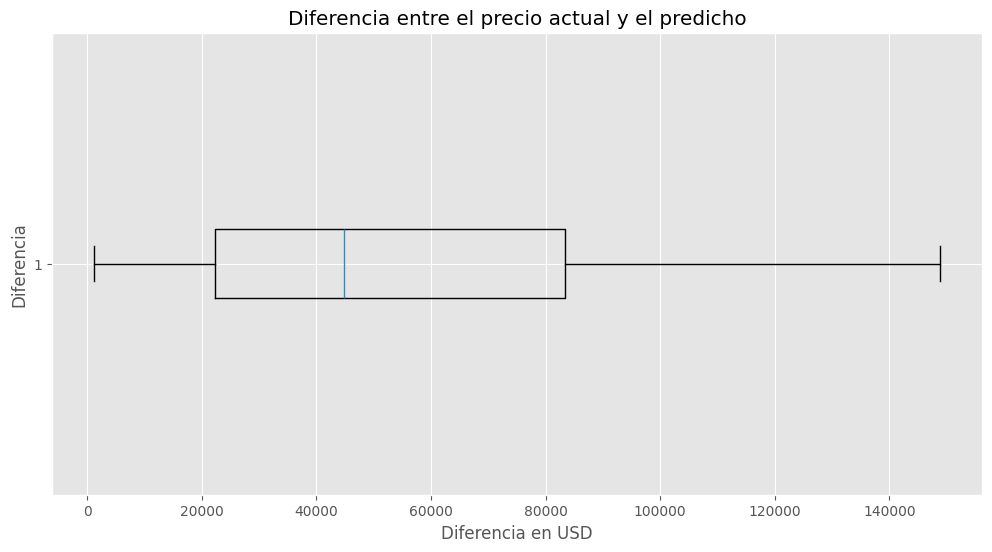

In [202]:
# Graphical representation of the difference between the predicted and actual price in boxplot without outliers
plt.figure(figsize=(12, 6))
plt.boxplot(Compare['Diferencia'], vert=False, showfliers=False)
plt.title('Diferencia entre el precio actual y el predicho')
plt.xlabel('Diferencia en USD')
plt.ylabel('Diferencia')
plt.show()

<h1 id="goto8" style="background-color:orangered;font-family:newtimeroman;color:black;font-size:350%;text-align:center;border-radius: 50px 50px;">Conclusiones</h1>

<div style="font-family: cursive">

[Regresar al Contenido](#goto0)

</div>

### Resumen del Problema y Objetivo
El objetivo de este análisis fue predecir el precio de propiedades inmobiliarias utilizando un conjunto de datos que incluye características como la fecha de construcción, el tipo de propiedad y otras variables relevantes.

### Descripción de los Datos
El conjunto de datos utilizado contiene información sobre diversas propiedades, incluyendo variables categóricas y numéricas. Se realizó una imputación de valores nulos y una codificación de variables categóricas para preparar los datos para el modelado.

### Preprocesamiento de Datos
Se aplicaron las siguientes técnicas de preprocesamiento:
- Imputación de valores nulos utilizando un imputador KNN.
- Codificación de variables categóricas utilizando LabelEncoder y Dummy Variables.
- División de los datos en conjuntos de entrenamiento y prueba con una proporción de 80/20.

### Modelado y Evaluación
Se utilizaron modelos de AutoGluon para predecir el precio de las propiedades. Los modelos fueron entrenados y evaluados utilizando los conjuntos de datos con codificación LabelEncoder y Dummy Variables. Los resultados de las evaluaciones mostraron que los modelos no lograron un buen rendimiento en términos de R cuadrado y otras métricas de evaluación.

### Conclusiones Principales
- El modelo de AutoGluon con codificación LabelEncoder mostró un rendimiento ligeramente superior en comparación con el modelo con Dummy Variables.
- Diferentes técnicas de imputación de valores nulos y de codificación de variables categóricas podría mejorar el resultado final .

### Recomendaciones y Pasos Futuros
- Se recomienda explorar otras técnicas de imputación y codificación para ver si se pueden obtener mejoras adicionales en el rendimiento del modelo.
- Considerar la inclusión de más características relevantes y la eliminación de características redundantes para optimizar el modelo.
- Aplicar el modelo en un entorno de producción para predecir precios de propiedades en tiempo real y evaluar su rendimiento en datos nuevos.

En resumen, el análisis y modelado predictivo realizado en este notebook proporcionó una base para predecir el precio de propiedades inmobiliarias, con resultados que pueden ser mejorados con futuras iteraciones y refinamientos.